<a href="https://colab.research.google.com/github/anushayarramsetti/FMMLLAB1/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [2]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [12]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

ANSWERS:

1) QUESTION ANSWER




* The accuracy of the validation set will generally increase as the percentage of validation set increases.
* This is because the model will have less data to overfit to,and will therefore be more generalizable to new data.
* However,if the percentage of validation set becomes to large,the model may not have enough data to learn from,and its accuracy may start to decrease.
* On the other hand,if we reduce the percentage of the validation set,the accuracy might decrease because the model has less data to validate its
 performance.

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
a,b = np.random.rand(100,10),np.random.randint(0,2,100)
validation_percentages = [0.1,0.2,0.3,0.4,0.5]
for val_percentage in validation_percentages:
  a_train,a_val,b_train,b_val = train_test_split(a,b,test_size=val_percentage,random_state=42)
  model= LogisticRegression()
  model.fit(a_train,b_train)
  b_pred=model.predict(a_val)
  accuracy = accuracy_score(b_val,b_pred)
  print(f"validation Set Percentage: {val_percentage * 100}% | Accuracy: {accuracy*100:.2f}%")

validation Set Percentage: 10.0% | Accuracy: 60.00%
validation Set Percentage: 20.0% | Accuracy: 55.00%
validation Set Percentage: 30.0% | Accuracy: 50.00%
validation Set Percentage: 40.0% | Accuracy: 55.00%
validation Set Percentage: 50.0% | Accuracy: 44.00%


2) QUESTION ANSWER



* The size of the train and validation sets can affect how well we can predict the accuracy on the test using the validation set.
* If we have a larger training set,the model can learn more patterns and potentially perform better on the test set.
*  However,if the validation set is too small,it may not accurately represent the test set,leading to less reliable predictions of accuracy.
* It's important to find the right balance between the sizes of the train and validation sets for accurate predictions.


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
a,b=np.random.rand(100,10),np.random.randint(0,2,100)
train_sizes=[0.2,0.4,0.6,0.8]
for train_size in train_sizes:
  a_train,a_val,b_train,b_val=train_test_split(a,b,train_size=train_size,random_state=42)
  model = LogisticRegression()
  model.fit(a_train,b_train)
  b_pred=model.predict(a_val)
  accuracy = accuracy_score(b_val,b_pred)
  print(f"Training Set Size: {train_size * 100}% | Accuracy: {accuracy*100:2f}%")

Training Set Size: 20.0% | Accuracy: 51.250000%
Training Set Size: 40.0% | Accuracy: 51.666667%
Training Set Size: 60.0% | Accuracy: 50.000000%
Training Set Size: 80.0% | Accuracy: 50.000000%


3) QUESTION ANSWER



* It's hard to give an exact percentage since it can vary depending on the specific dataset and problem.
* But a common practice is to reserve around 20-30% of the data for the validation data set.This allows for a sufficient amount of data for training while also providing a sizable portion for validation.
* It's always a good idea to experiment with different percentages to find the best balance for your specific scenario.



In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
a,b= np.random.rand(100,10),np.random.randint(0,2,100)
validation_percentages = [0.1,0.15,0.2,0.25,0.3]
best_accuracy=0
best_val_percentage=0
for val_percentage in validation_percentages:
  a_train,a_val,b_train,b_val = train_test_split(a,b,test_size=val_percentage,random_state=42)
  model= LogisticRegression()
  model.fit(a_train,b_train)
  b_pred=model.predict(a_val)
  accuracy = accuracy_score(b_val, b_pred)
  if accuracy > best_accuracy:
    best_accuracy=accuracy
    best_val_percentage=val_percentage
  print(f"Best Validation Set Percentage: {best_val_percentage * 100}% | Best_Accuracy: {best_accuracy*100:.2f}%")

Best Validation Set Percentage: 10.0% | Best_Accuracy: 60.00%
Best Validation Set Percentage: 10.0% | Best_Accuracy: 60.00%
Best Validation Set Percentage: 10.0% | Best_Accuracy: 60.00%
Best Validation Set Percentage: 10.0% | Best_Accuracy: 60.00%
Best Validation Set Percentage: 10.0% | Best_Accuracy: 60.00%


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [13]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [14]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


ANSWERS:

In [20]:
split_accuracies = []
av_accuracies = []

def MyAverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0

  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    split_accuracy = Accuracy(vallabel, valpred)
    split_accuracies.append(split_accuracy)
    print(f"Split number {ii} has validation accuracy = {split_accuracy}")
    accuracy += split_accuracy
  return accuracy/iterations # average of all accuracies

for i in range(5):
  avg_accuracy = MyAverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN)
  av_accuracies.append(avg_accuracy)
  print('Average validation accuracy is ', avg_accuracy)
  print("----------------------------------------")

testpred = NN(alltraindata, alltrainlabel, testdata)
print('Test accuracy is ', Accuracy(testlabel, testpred))

Split number 0 has validation accuracy = 0.33895086636600996
Split number 1 has validation accuracy = 0.33527696793002915
Split number 2 has validation accuracy = 0.34932349323493234
Split number 3 has validation accuracy = 0.3398034986820034
Split number 4 has validation accuracy = 0.3345651638334565
Split number 5 has validation accuracy = 0.3396547532214928
Split number 6 has validation accuracy = 0.33268905532737375
Split number 7 has validation accuracy = 0.33225886436895613
Split number 8 has validation accuracy = 0.3379006606312699
Split number 9 has validation accuracy = 0.342061013692049
Average validation accuracy is  0.33824843372875724
----------------------------------------
Split number 0 has validation accuracy = 0.3361158850969801
Split number 1 has validation accuracy = 0.34951456310679613
Split number 2 has validation accuracy = 0.35184732077318326
Split number 3 has validation accuracy = 0.3425588735129886
Split number 4 has validation accuracy = 0.3551425030978934
S

1) QUESTION ANSWER

  YES.

* Averaging the validation accuracy across multiple splits can give more consistent result
*  By performing multiple splits of the data into train and validation sets and calculating the accuracy for each split,we can reduce the impact of randomness and obtain a more reliable estimate of the model's performance.
* It helps to get a better understanding of how the model generalizes to different subsets of the data.

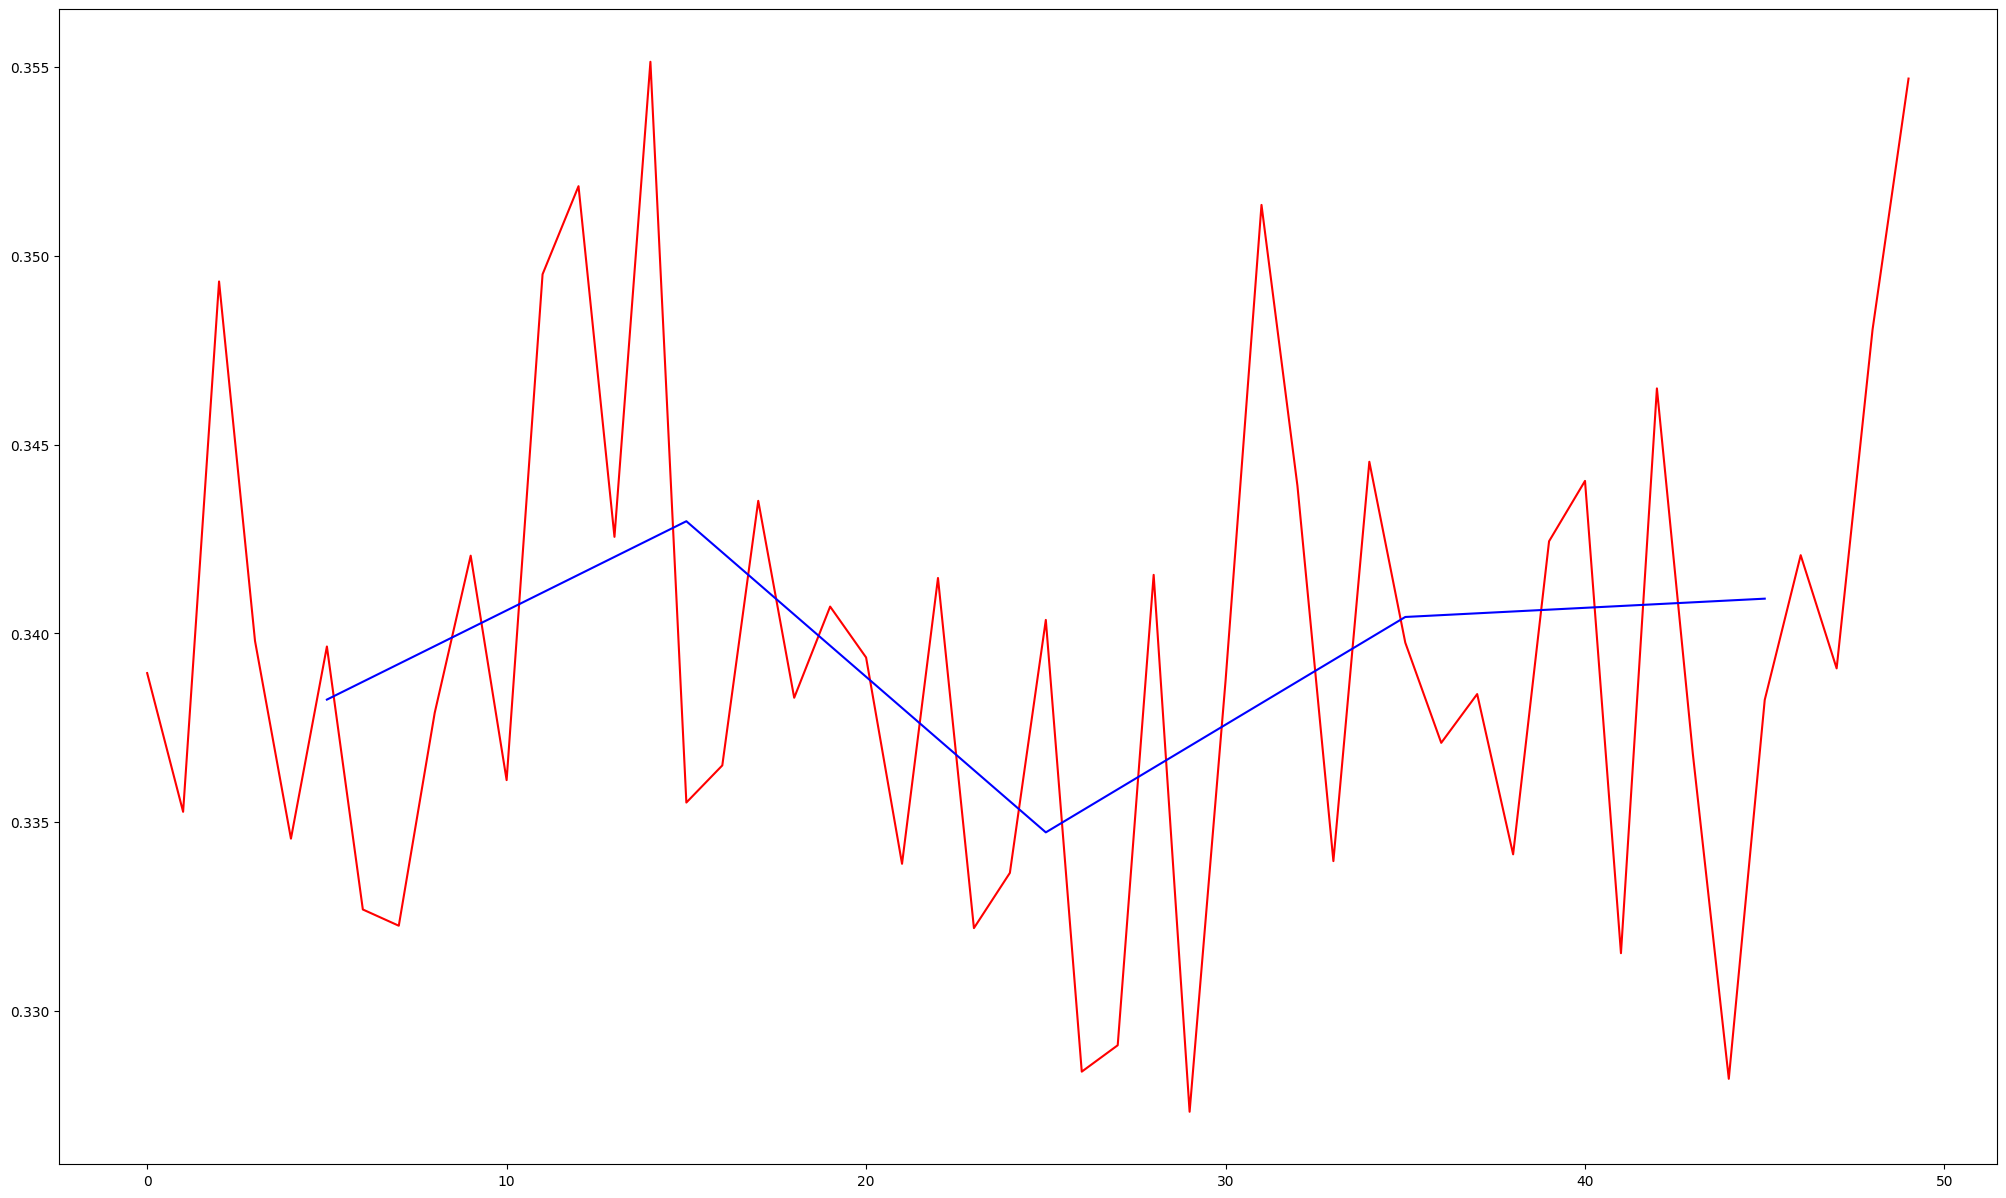

In [21]:
plt.figure(figsize = (25,15))
plt.plot(split_accuracies, label = 'Split Accuracy', color = 'red')
plt.plot([5, 15, 25, 35, 45], av_accuracies, label = 'Average Validation Accuracy', color = 'blue')
plt.show()

In [22]:
import numpy as h
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
a,b=h.random.rand(100,10),h.random.randint(0,2,100)
model=LogisticRegression()
k=4
accuracies= cross_val_score(model,a,b,cv=k)
avg_accuracy=h.mean(accuracies)
std_dev=h.std(accuracies)
print(f"Average Accuracy: {avg_accuracy * 100:2f}%")
print(f"Standard Deviation: {std_dev*100:2f}%")

Average Accuracy: 42.000000%
Standard Deviation: 6.633250%


2) QUESTION ANSWER


* YES, utilizing techniques like k-fold cross-validation for model evaluation tends to provide a more accurate estimate of test accuracy.
* This is because it systematically evaluates the model on different subsets of the data, which helps to reduce the bias and variance that can be associated with a single train-test split.
* By averaging the results over multiple splits, it provides a more reliable representation of how well the model is likely to perform on unseen data.
* This approach is particularly valuable for obtaining a robust and trustworthy estimate of a model's true generalization performance

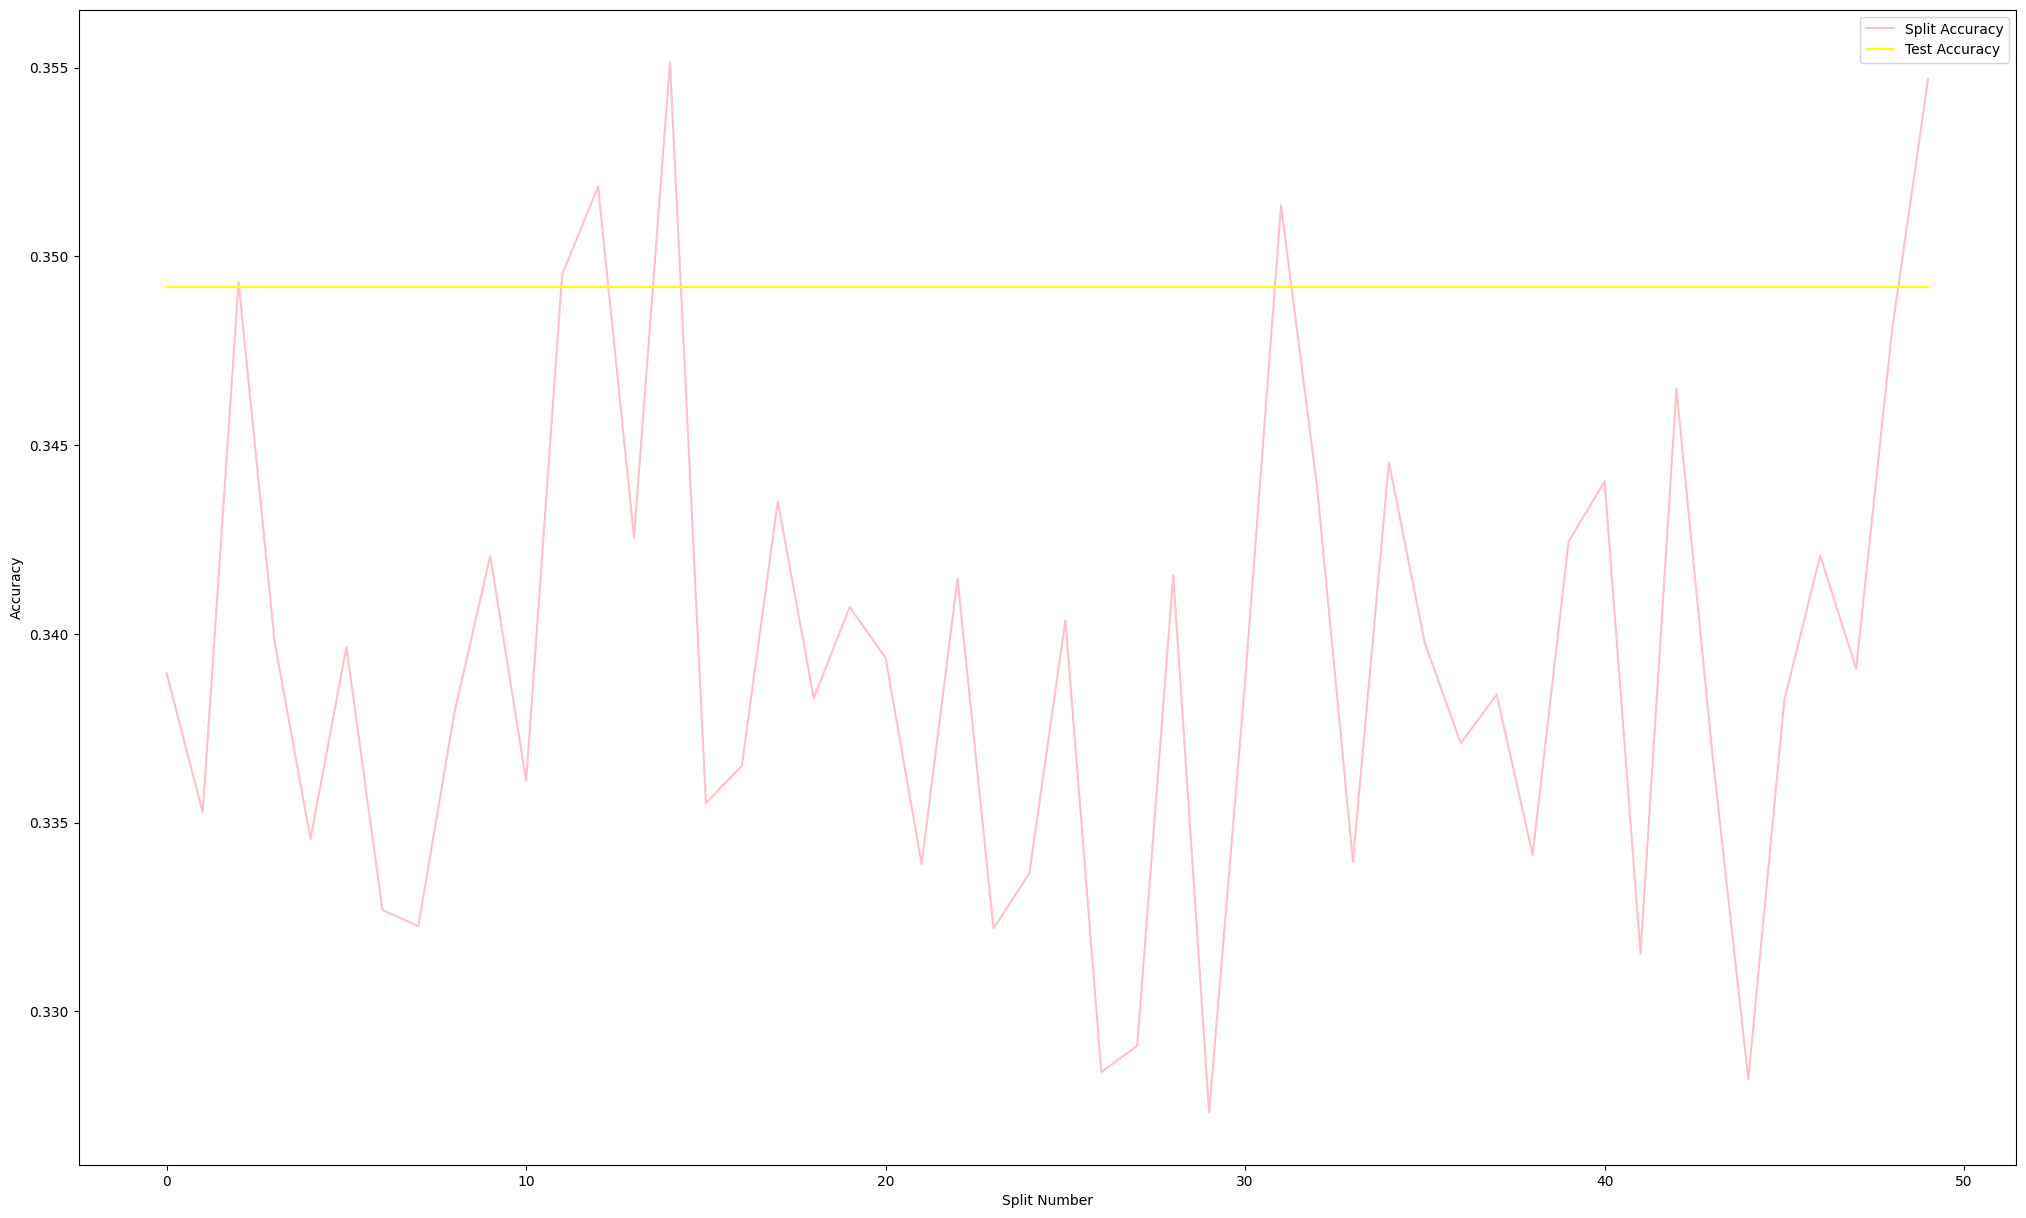

In [24]:
plt.figure(figsize = (25,15))
plt.plot(split_accuracies, label = 'Split Accuracy', color = 'pink')
plt.plot(np.ones(len(split_accuracies)) * Accuracy(testlabel, testpred), label = 'Test Accuracy', color = 'yellow')
plt.xlabel('Split Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
import numpy as h
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
a,b=h.random.rand(100,10),h.random.randint(0,2,100)
param_grid={'C': [0.001,0.01,0.1,1,10]}
model=LogisticRegression()
n_splits=4
stratified_kfold=StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=42)
test_accuracies=cross_val_score(model,a,b,cv=stratified_kfold)
avg_test_accuracy=h.mean(test_accuracies)
std_dev_test_accuracy=h.std(test_accuracies)
print(f"Average Test Accuracy: {avg_test_accuracy * 100:2f}%")
print(f"Standard Deviation of Test Accuracy: {std_dev_test_accuracy*100:2f}%")

Average Test Accuracy: 51.000000%
Standard Deviation of Test Accuracy: 7.141428%


3) QUESTION ANSWER



* With higher iterations,we might get a better estimate of the model's performance.
* More iterations allow the model to learn from the data in greater detail and make finer adjustments to improve its accuracy.
* However,there is a point of diminshing returns,where increasing iterations may not significantly improve the estimate and may even lead to overfitting.
* It's important to find the right balance between the number of iterations and the model's performance.


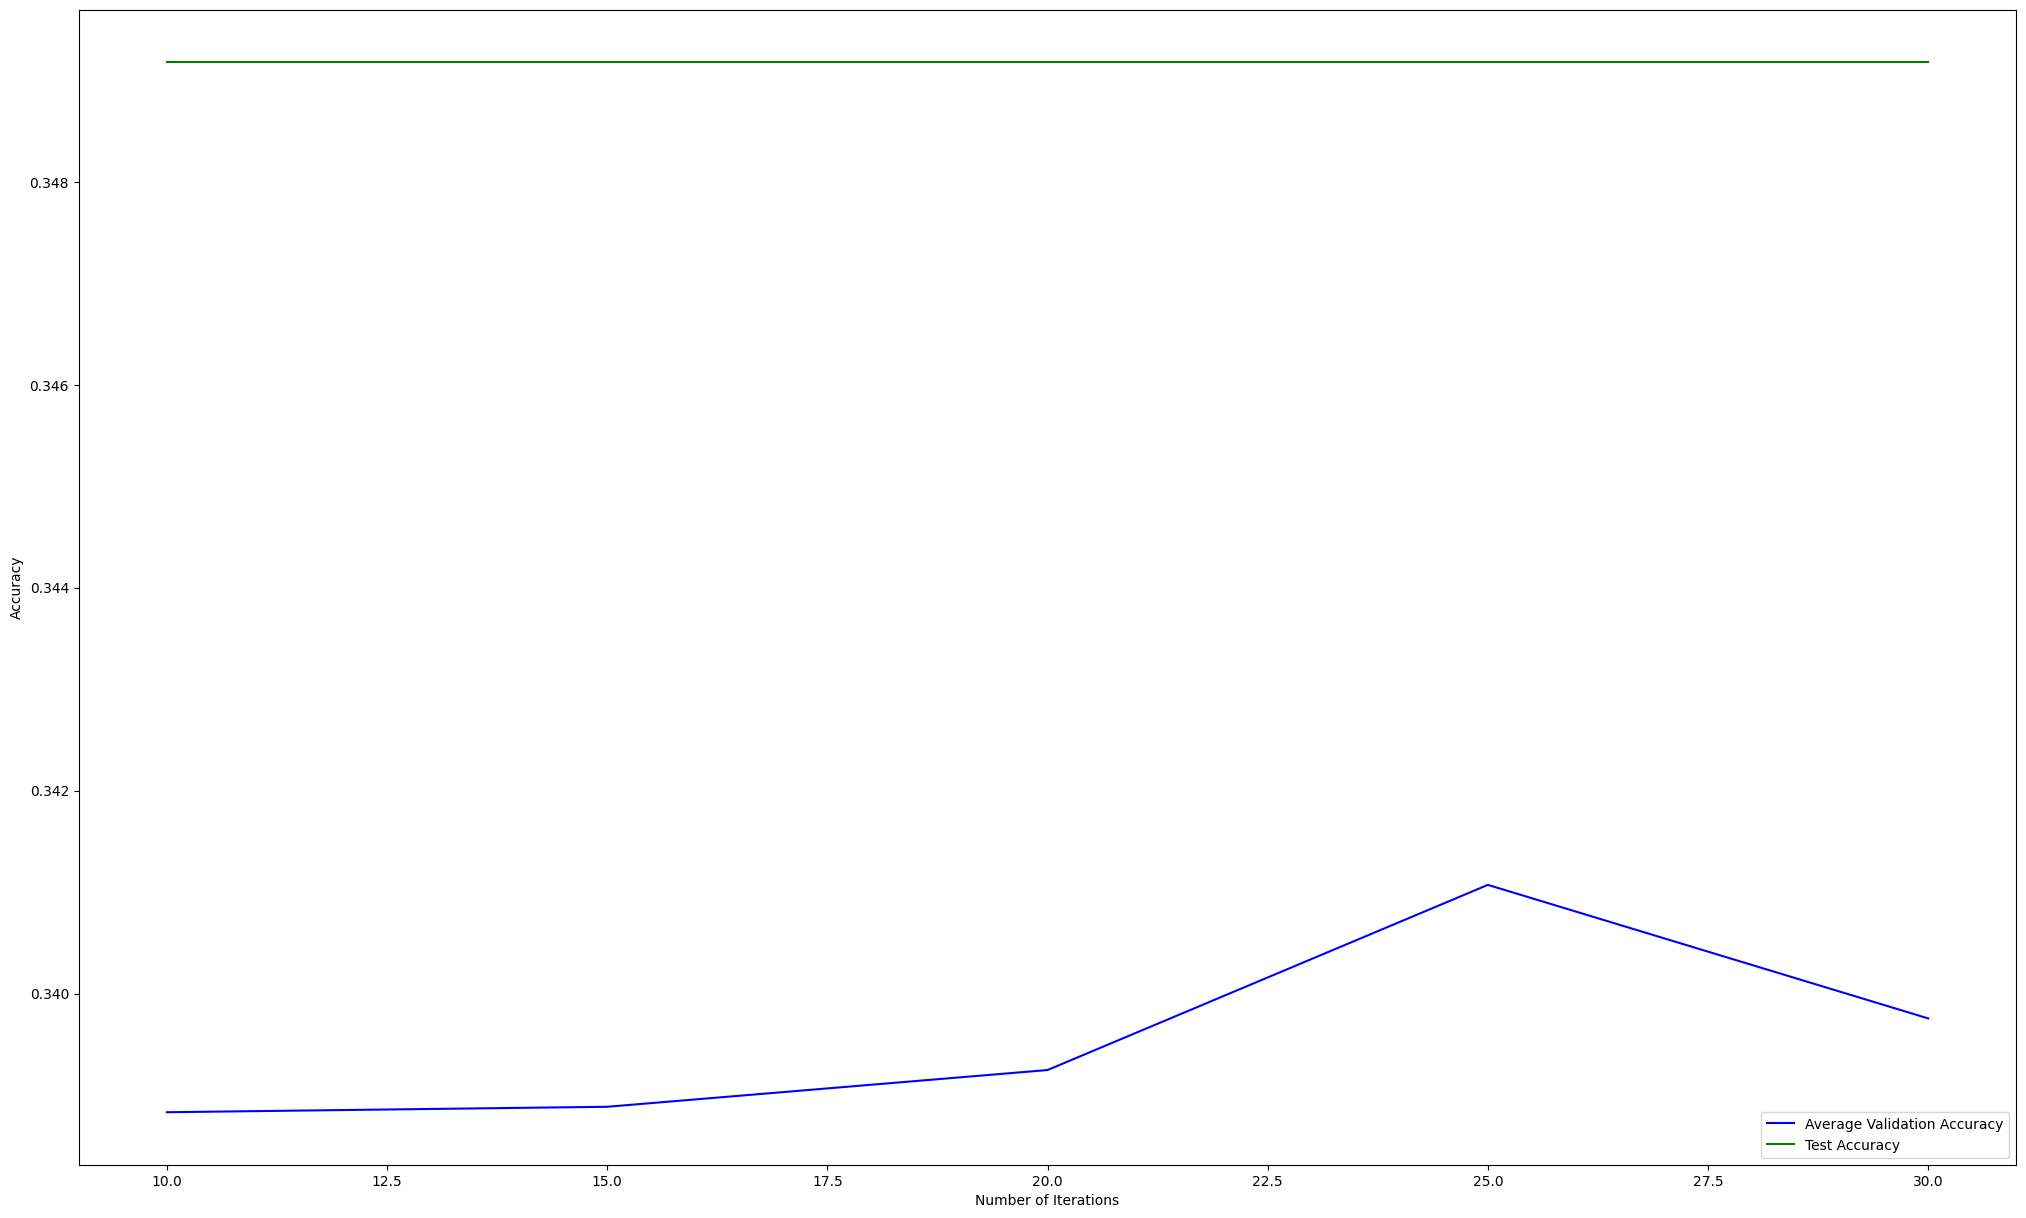

In [30]:
avg_accuracy_iter = []
iterations_list = [10,15,20,25,30]

for i in iterations_list:
  avg_accuracy_iter.append(AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier=NN))

plt.figure(figsize = (25,15))
plt.plot(iterations_list, avg_accuracy_iter, label = 'Average Validation Accuracy', color = 'blue')
plt.plot(iterations_list, np.ones(len(avg_accuracy_iter)) * Accuracy(testlabel, testpred), label = 'Test Accuracy', color = 'green')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
import random
def estimate_average(iterations):
  total_sum=0
  for i in range(iterations):
      random_number=random.uniform(0,1)
      total_sum +=random_number
  average_estimate=total_sum/iterations
  return average_estimate
h=[100,1000,10000,100000,1000000]
for iterations in h:
  avg_estimate = estimate_average(iterations)
  print(f"Iterations: {iterations},Estimated Average: {avg_estimate}")

Iterations: 100,Estimated Average: 0.5426560347669378
Iterations: 1000,Estimated Average: 0.5037321252743837
Iterations: 10000,Estimated Average: 0.5017798713590855
Iterations: 100000,Estimated Average: 0.5015483763974372
Iterations: 1000000,Estimated Average: 0.49973765573712686


4) QUESTION ANSWER



   YES.

* Increasing the iterations can help mitigate the impact of a small train or validation dataset to some extent.
* By allowing the model to go through more iterations,it gets more opportunities to learn from the available data make better predictions.
* However,it's important to note that while increasing iterations can compensate for small datasets to some degree,it is still crucial to have a sufficiently sized dataset for accurate model training andvalidation.




In [31]:
import numpy as h
def generate_random_data(num_points):
  a=h.random.rand(num_points)
  b = 2 * a+ 1 + h.random.randn(num_points) * 0.1
  return a,b
iterations=10
a_train,b_train=generate_random_data(iterations)
for i in range(iterations):
  print(f"Data Point {i+1}: A={a_train[i]},B={b_train[i]}")

Data Point 1: A=0.6085125950512585,B=2.1574834301606303
Data Point 2: A=0.1730066636774482,B=1.2210933526275158
Data Point 3: A=0.8299905928143321,B=2.6571341457942035
Data Point 4: A=0.5869175362182819,B=2.223664589577095
Data Point 5: A=0.5783318417394875,B=2.2742256980851425
Data Point 6: A=0.6755447530300958,B=2.369798055107321
Data Point 7: A=0.030843571333045494,B=1.193177139594657
Data Point 8: A=0.5045818157031198,B=2.069740315704786
Data Point 9: A=0.24621276660573888,B=1.4167364675696759
Data Point 10: A=0.03333063451996321,B=1.0210381489094495
